In [3]:
# Problem 1
import numpy as np
from scipy import linalg as la

def solve(A, b):
    Q,R = la.qr(A, mode="economic")
    x = la.solve_triangular(R, np.dot(Q.T, b))
    return x

[   3.37476604  164.08096257]


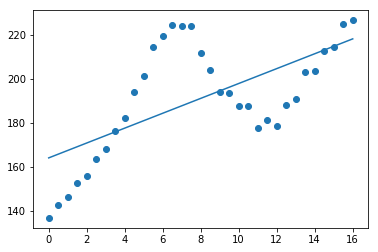

In [4]:
# Problem 2
housing = np.load('/Users/Sophia/Desktop/BootCamp2017/Computation/Wk3_Decomp/housing.npy')
# Construct A, b 
A = np.column_stack((housing[:,0], np.ones_like(housing[:,0])))
b = housing[:,1]

# Calculate 
x = solve(A, b)
print(x)

# Plot
from matplotlib import pyplot as plt
plt.scatter(housing[:, 0], housing[:,1])
x1 = np.linspace(0, int(16), 100)
y1 = [x[0] * x1 + x[1] for x1 in x1]
plt.plot(x1, y1)
plt.show()

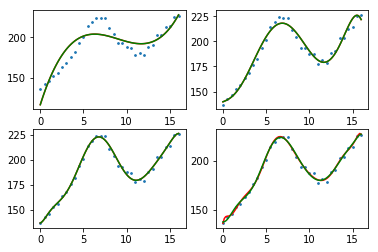

In [5]:
# Problem 3
A1 = np.vander(housing[:,0],4)
A2 = np.vander(housing[:,0],7)
A3 = np.vander(housing[:,0],10)
A4 = np.vander(housing[:,0],13)
b = housing[:,1]

x1 = la.lstsq(A1, b)[0]
x2 = la.lstsq(A2, b)[0]
x3 = la.lstsq(A3, b)[0]
x4 = la.lstsq(A4, b)[0]

x = np.linspace(0, int(16), 100)
y1 = np.poly1d(x1)
y2 = np.poly1d(x2)
y3 = np.poly1d(x3)
y4 = np.poly1d(x4)

plt.subplot(221)
plt.scatter(housing[:, 0], housing[:,1] , s = 3)
plt.plot(x, np.poly1d(np.polyfit(housing[:,0], b, 3))(x), c='r')
plt.plot(x, y1(x) , c='g')

plt.subplot(222)
plt.scatter(housing[:, 0], housing[:,1], s = 3)
plt.plot(x, np.poly1d(np.polyfit(housing[:,0], b, 6))(x), c='r')
plt.plot(x, y2(x) , c='g')

plt.subplot(223)
plt.scatter(housing[:, 0], housing[:,1], s = 3)
plt.plot(x, np.poly1d(np.polyfit(housing[:,0], b, 9))(x), c='r')
plt.plot(x, y3(x) , c='g')

plt.subplot(224)
plt.scatter(housing[:, 0], housing[:,1], s = 3)
plt.plot(x, np.poly1d(np.polyfit(housing[:,0], b, 12))(x), c='r')
plt.plot(x, y4(x) , c='g')

plt.show()

We can barely see the red lines obtained from python's function np.polyfit(), so the two methods yield very similar results

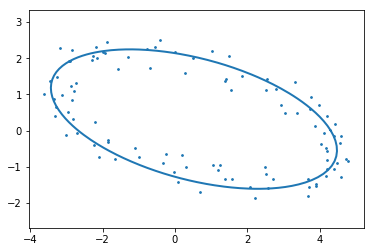

In [6]:
# Problem 4
x, y = np.load('/Users/Sophia/Desktop/BootCamp2017/Computation/Wk3_Decomp/ellipse.npy').T
A = np.column_stack((x**2, x, x*y, y, y**2))
b = np.ones_like(x)
a, b, c, d, e = la.lstsq(A, b)[0]

def plot_ellipse(a, b, c, d, e):
    """Plot an ellipse of the form ax^2 + bx + cxy + dy + ey^2 = 1."""
    theta = np.linspace(0, 2*np.pi, 200)
    cos_t, sin_t = np.cos(theta), np.sin(theta)
    A = a*(cos_t**2) + c*cos_t*sin_t + e*(sin_t**2)
    B = b*cos_t + d*sin_t
    r = (-B + np.sqrt(B**2 + 4*A))/(2*A)
    plt.plot(r*cos_t, r*sin_t, lw=2)
    plt.gca().set_aspect("equal", "datalim")

plt.scatter(x, y ,s = 3)
plot_ellipse(a, b, c, d, e)
plt.show()

In [38]:
# Problem 5
def power_method(A):
    d = 1
    k = 1
    max_iter = 100000
    tol = 1e-12
    m = np.shape(A)[0]
    n = np.shape(A)[1]
    x0 = np.random.rand(n, 1)
    x0 = x0/la.norm(x0)
    while k < max_iter and d > tol:
        x1 = np.dot(A, x0)
        x1 = x1/la.norm(x1)
        d = abs(la.norm(x1) - la.norm(x0))
        x0 = x1
        k += 1
    return np.dot(np.dot(x0.T, A), x0), x0

A = np.random.random((10,10))
eigs, vecs = la.eig(A)
loc = np.argmax(eigs)
lamb, x = eigs[loc], vecs[:,loc]
print(lamb)

eigs1, vecs1 = power_method(A)
print(eigs1)

(5.30422535138+0j)
[[ 5.26108208]]


In [41]:
# Problem 6
import cmath

def QR_Algorithm(A):
    k = 1
    max_iter = 10000
    tol = 1e-12
    m = np.shape(A)[0]
    n = np.shape(A)[1]
    S = la.hessenberg(A)
    while k < max_iter:
        Q, R = la.qr(A)
        S = np.dot(R, Q)
        k += 1
    eigs = []
    i = 0
    while i < n:
        if i == n - 1 or abs(S[i+1, i])< tol:
            eigs.append(S[i,i])
        else:
            a = S[i, i]
            b = S[i, i + 1]
            c = S[i + 1, i]
            d = S[i + 1, i + 1]
            eig1 = 0.5*(a + d + cmath.sqrt((a + d) ** 2 - 4 * (a * d - b * c)))
            eigs.append(eig1)
            eig2 = 0.5*(a + d - cmath.sqrt((a + d) ** 2 - 4 * (a * d - b * c)))
            eigs.append(eig2)
            i += 1
        i += 1
    return eigs
            
A = np.random.random((4,4))
A = A + A.T
w, v = la.eig(A)
print(w)
print(QR_Algorithm(A))

[ 3.60520089+0.j -0.18876592+0.j -0.35353037+0.j -0.84440268+0.j]
[(3.5143661347143866+0j), (-0.63103560358032462+0j), (-0.25940395189065413+0j), (-0.40542465285160922+0j)]


The results are very close.